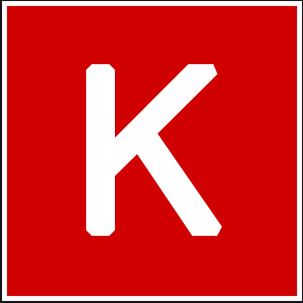

# <center>Fashion MNIST Classification Using Convolutional Neural Network with Keras</center>

# 1. Introduction

In this excercise/mini project I am trying to classify the Fashion MNIST dataset as I get myself equipped with Convoltuional Layers in Keras.

<b>Goal</b>: Primary goal of this excercise is to equip myself with Keras set up with regards to a Covolutional Neural Network by implementing the LeNet-5 architecture. Secondary goal is to achieve atleast 90% success in predicting the right labels for the Fashion MNIST Images.

<b>Dataset</b>: Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes and there're 6000 examples from each class. Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms. You can read more about the dataset <a href='https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/'>here</a>. The data is downloaded(called) from the Keras' dataset library.

<b>Approach</b>: First the dataset is loaded from the keras dataset package,the dataset is then reshaped and normalized. I then implement the pioneered LeNet-5 Architecture as the final Convolutional Neural Network model. Further we evaluate the model and do some analysis on the predictions made by the model.

<b>Results</b>: After training the Lenet-5 model for 40 epochs, the model attains an accuracy of 96.53% on the training set and an accuracy of 89.81% on test test and around 87% of images misclassified are similar in shapes suggesting that the model has not yet learned the nuances in shapes of different categories

<b>Future Works</b>: A deeper model would at best remove most of the misclassification problems and at worst have similar performance to that of LeNet-5.Further some regularization can also be added to lower the variance.

<b>Dates</b>: Feb 17th - 18th 2020

# 2. Libraries

In [89]:
import keras as K
import numpy as np
import matplotlib.pyplot as plt

# 3. Dataset

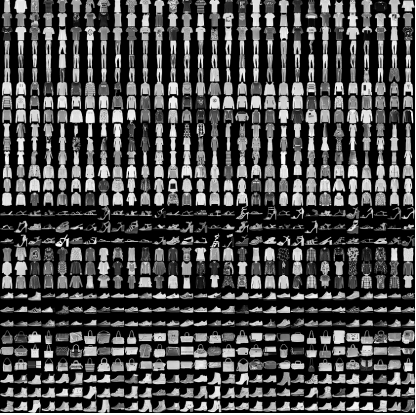

In [90]:
(x_train, y_train), (x_test, y_test) = K.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3.1 Shape

The Shape of the dataset tells us there're 60000 training samples & each training sample is a greyscale image represented in the form of 28x28 pixel values, we will format the shapes inaccordance with the Keras Conv2d implementation.

In [169]:
print('Shapes of Train & Test Sets')
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test: ' + str(x_test.shape))
print('y_test: ' + str(y_test.shape))

x_train_reshaped = np.reshape(x_train, (60000, 28, 28, 1))
x_test_reshaped = np.reshape(x_test, (10000, 28, 28, 1))
print('After Reshaping')
print('x_train_reshaped: ' + str(x_train.shape))
print('x_test_reshaped: ' + str(x_test.shape))
x_train_reshaped, x_test_reshaped = x_train_reshaped / 255.0, x_test_reshaped / 255.0

Shapes of Train & Test Sets
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
After Reshaping
x_train_reshaped: (60000, 28, 28)
x_test_reshaped: (10000, 28, 28)


# 3.2 Dictionary For Labels

We map the numbers with appropriate labels using dictionaries. Labels have been mapped as per the <a href='https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md'>source</a>.

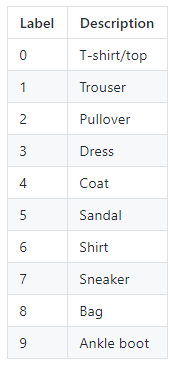

In [170]:
Labels_Dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}
print(Labels_Dict[5])

Sandal


# 3.2 Bayes Optimal Error

It is difficult to  get a sense of Bayes optimal error here. All classes seems easy to guess except pullover, coat & shirt which are overalapping in appearance a bit.  

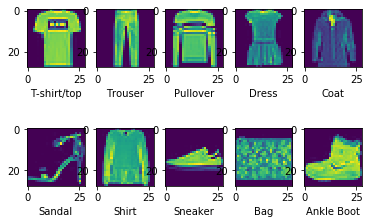

In [148]:
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[y_train == i][0])
    plt.xlabel(Labels_Dict[i])

# 4. Model Building - LeNet 5

<img src="http://drive.google.com/uc?export=view&id=1ztZNavaNR9FVL5yfYV0houfdhxhpPJUz">
<i><a href='https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d'>Image Source</a></i>

Since it's just a learning experiment I have decided to first start with the one of most earliset & successful architecture of <b>LeNet 5</b>, only change is our input is 28 * 28 * 1 instead of 32 * 32 * 1. One can quite literally see the power of Keras which allows us to build complex model with relative ease, this is easier than drawing the model on paper.

In [94]:
model = K.models.Sequential([
    K.layers.Conv2D(6, kernel_size= (5,5),strides = 1, activation='relu', input_shape=(28,28,1)),
    K.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    K.layers.Conv2D(16, kernel_size= (5,5),strides = 1, activation='relu'),
    K.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    K.layers.Flatten(),
    K.layers.Dense(120, activation='relu'),
    K.layers.Dense(84, activation='relu'),
    K.layers.Dense(10)
])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_36 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_37 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_33 (Dense)             (None, 84)              

I chose the <b>Adam Optimizer</b> for the gradient optimation as it provides the best of both Momentum & the RMS Prop (Root Mean Square) approach for optimization. <b> SparseCategoricalCrossentropy </b> is used for the multinomial classification using softmax regression function to calculate loss. Finally we've selected <b>accuracy</b> as one number measure for the model.

In [95]:
model.compile(optimizer='adam',
              loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

After several rounds of iteration <b>40 epochs</b> is chosen as the optimum time till which the gradient descent optimatizion is continued when training the data. Training set accuracy is realized at 96.82% after 40 epochs worth of training. The total time taken to train was approximately 13 minutes. This can be improved if we try other sophisticated archtectures or even a slight modulation here mat also work. But let's keep that for future & not interrupt with the LeNet-5 approach for now.

In [97]:
model.fit(x_train_reshaped, y_train, epochs=40)

Epoch 1/40
60000/60000 [==============================] - 22s 363us/step - loss: 0.5083 - accuracy: 0.8089
Epoch 2/40
60000/60000 [==============================] - 22s 367us/step - loss: 0.4008 - accuracy: 0.8526
Epoch 3/40
60000/60000 [==============================] - 21s 356us/step - loss: 0.3517 - accuracy: 0.8704s
Epoch 4/40
60000/60000 [==============================] - 22s 359us/step - loss: 0.3214 - accuracy: 0.8819
Epoch 5/40
60000/60000 [==============================] - 22s 361us/step - loss: 0.2981 - accuracy: 0.8907
Epoch 6/40
60000/60000 [==============================] - 21s 357us/step - loss: 0.2798 - accuracy: 0.8956
Epoch 7/40
60000/60000 [==============================] - 22s 359us/step - loss: 0.2653 - accuracy: 0.9023
Epoch 8/40
60000/60000 [==============================] - 22s 359us/step - loss: 0.2529 - accuracy: 0.9060
Epoch 9/40
60000/60000 [==============================] - 22s 363us/step - loss: 0.2413 - accuracy: 0.9096
Epoch 10/40
60000/60000 [===========

# 5. Model Evaluation

![test](https://media.giphy.com/media/7MZ0v9KynmiSA/giphy.gif)

An Overall accuracy of <b>89.81%</b> is very far from the training set accuracy of <b>96.82%</b>. Probably a deeper architecture would get better results and most likely this model will perform better on higher qualities of image. We can comment more on the model performance when we see the nature of misclassification.

In [71]:
model.evaluate(x_test_reshaped,  y_test, verbose=2)

[0.4605568838238716, 0.8981000185012817]

# 5.1 Predicting Test Images 
Predicting classes for images from test dataset and storing Misclassified Labels & Images in a separate array for further analysis.

In [162]:
y_pred = model.predict_classes(x_test_reshaped)
misclassifiedImages = x_test[y_pred != y_test]
misClassfiedLabels = y_pred[y_pred != y_test]
trueLabels = y_test[y_pred != y_test]
print('Images Shape' + str(misclassifiedImages.shape))
print('Labels Shape' + str(misClassfiedLabels.shape))

Images Shape(1036, 28, 28)
Labels Shape(1036,)


# 5.2 Random Sampling Misclassified Images
From the below randomly sampled misclassified images  it can be clearly seen that most of the images misclassified are closely related suggesting that this could have been one of the major reasons why Images were  Misclassified, suggesting the need for either a deeper network or higher quality images

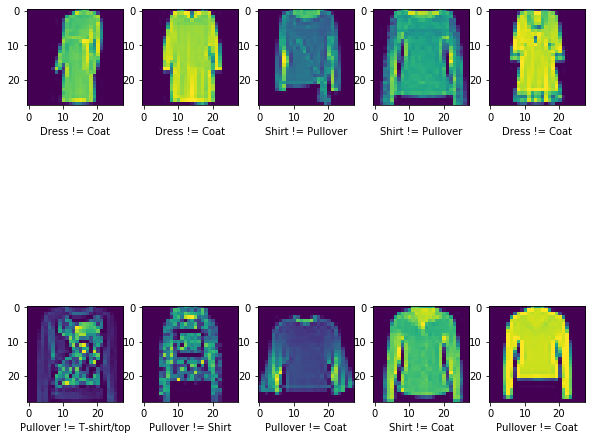

In [168]:
np.random.seed(17)
random_samples = np.random.randint(0,1036,10)
plt.figure(figsize=(10,10))
for i in range(0,10):
    plt.subplot(2, 5, i+1)
    plt.imshow(misclassifiedSamples[random_samples[i]])
    plt.xlabel(Labels_Dict[trueLabels[random_samples[i]]] + " != " + Labels_Dict[misClassfiedLabels[random_samples[i]]])

# 5.4 Distribution of Misclassified Categories

T-shirt/top, Pullover , Dress, Coat and Shirt together account for approximately 87% misclassified images again this may be due to the similarity in shapes of this category inaddition to low quality images, which is causing the Convolutional Neural Network to probabaly misrecognize some of the features.

In [190]:
misClassifiedCounts = np.unique(trueLabels, return_counts=True)
for i in range(0,10):
    print(Labels_Dict[i] + " - " + str(round(misClassifiedCounts[1][i]*100/1036,2)) + "%")

T-shirt/top - 16.99%
Trouser - 2.03%
Pullover - 18.63%
Dress - 12.84%
Coat - 11.87%
Sandal - 2.61%
Shirt - 24.81%
Sneaker - 3.86%
Bag - 2.7%
Ankle Boot - 3.67%


# 6. Conclusion 

I think I've been able to achieve more or less what I set out to achieve, although the Test performance is not up to standards but still as a study this gives us greater intuition about which hyperparameters needs to be adjusted in order to improve the performance.